# EVN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [2]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

## Vocabulary

In [3]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [4]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [5]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [6]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [7]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [8]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [9]:
# train inputs을 numpy array로 변환
np.array(train_inputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([2, 3, 4, 5]), list([2, 3, 6])], dtype=object)

In [10]:
# train labels을 numpy array로 변환
np.array(train_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([1, 1, 1, 2]), list([1, 1, 0])], dtype=object)

In [11]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [12]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [13]:
# 정답 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_labels:
    row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [14]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [15]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[ 0.02039656, -0.0048217 , -0.04711709,  0.02997581,
         -0.04123151, -0.01951878, -0.03921526, -0.00619873],
        [-0.00529512, -0.00072111,  0.02789929,  0.02617732,
          0.02203195,  0.0444493 , -0.00119374,  0.0343377 ],
        [-0.04441425,  0.04665054,  0.00678921, -0.03467607,
         -0.00724301, -0.00801908, -0.00185405, -0.00852596],
        [ 0.0293544 , -0.04701243,  0.01964908, -0.0385934 ,
          0.03682904,  0.00887834, -0.02435849,  0.04347256]],

       [[ 0.02039656, -0.0048217 , -0.04711709,  0.02997581,
         -0.04123151, -0.01951878, -0.03921526, -0.00619873],
        [-0.00529512, -0.00072111,  0.02789929,  0.02617732,
          0.02203195,  0.0444493 , -0.00119374,  0.0343377 ],
        [-0.04031191, -0.010367  , -0.03997123, -0.03079023,
          0.0123898 ,  0.03562794,  0.04470274, -0.02174441],
        [ 0.03142718,  0.01306206, -0.0330795 , -0.00315305,
          0.02268161, -0.

In [16]:
# embedding weight
weight = embedding.get_weights()[0]
weight

array([[ 0.03142718,  0.01306206, -0.0330795 , -0.00315305,  0.02268161,
        -0.00152242,  0.01172755,  0.01480062],
       [-0.0075891 , -0.01061141, -0.02785167, -0.03765055,  0.02295211,
         0.02788131, -0.02135532, -0.02576405],
       [ 0.02039656, -0.0048217 , -0.04711709,  0.02997581, -0.04123151,
        -0.01951878, -0.03921526, -0.00619873],
       [-0.00529512, -0.00072111,  0.02789929,  0.02617732,  0.02203195,
         0.0444493 , -0.00119374,  0.0343377 ],
       [-0.04441425,  0.04665054,  0.00678921, -0.03467607, -0.00724301,
        -0.00801908, -0.00185405, -0.00852596],
       [ 0.0293544 , -0.04701243,  0.01964908, -0.0385934 ,  0.03682904,
         0.00887834, -0.02435849,  0.04347256],
       [-0.04031191, -0.010367  , -0.03997123, -0.03079023,  0.0123898 ,
         0.03562794,  0.04470274, -0.02174441]], dtype=float32)

In [17]:
# numpy를 이용해서 직접 조회 (두 결과값 비교)
weight[train_inputs], hidden

(array([[[ 0.02039656, -0.0048217 , -0.04711709,  0.02997581,
          -0.04123151, -0.01951878, -0.03921526, -0.00619873],
         [-0.00529512, -0.00072111,  0.02789929,  0.02617732,
           0.02203195,  0.0444493 , -0.00119374,  0.0343377 ],
         [-0.04441425,  0.04665054,  0.00678921, -0.03467607,
          -0.00724301, -0.00801908, -0.00185405, -0.00852596],
         [ 0.0293544 , -0.04701243,  0.01964908, -0.0385934 ,
           0.03682904,  0.00887834, -0.02435849,  0.04347256]],
 
        [[ 0.02039656, -0.0048217 , -0.04711709,  0.02997581,
          -0.04123151, -0.01951878, -0.03921526, -0.00619873],
         [-0.00529512, -0.00072111,  0.02789929,  0.02617732,
           0.02203195,  0.0444493 , -0.00119374,  0.0343377 ],
         [-0.04031191, -0.010367  , -0.03997123, -0.03079023,
           0.0123898 ,  0.03562794,  0.04470274, -0.02174441],
         [ 0.03142718,  0.01306206, -0.0330795 , -0.00315305,
           0.02268161, -0.00152242,  0.01172755,  0.01480062

In [18]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.30974078, 0.33358   , 0.35667923],
        [0.33661675, 0.33570728, 0.32767594],
        [0.33820754, 0.3454954 , 0.31629696],
        [0.33891565, 0.3317491 , 0.32933527]],

       [[0.30974078, 0.33358   , 0.35667923],
        [0.33661675, 0.33570728, 0.32767594],
        [0.3643415 , 0.32442057, 0.3112379 ],
        [0.33942112, 0.32002047, 0.34055838]]], dtype=float32)>

In [19]:
# dense의 wieght, bias
weight, bias = linear.get_weights()
weight, bias

(array([[-0.19006485, -0.50339735,  0.6244512 ],
        [ 0.08750361,  0.21425134,  0.04717851],
        [-0.51609313,  0.07577658, -0.6007565 ],
        [-0.55910563, -0.19537693,  0.62213665],
        [ 0.6902321 , -0.7163261 , -0.31069702],
        [ 0.66749734,  0.08318198, -0.42004523],
        [ 0.44695026, -0.4037846 , -0.20897692],
        [-0.18446237,  0.56220096,  0.35180348]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [20]:
# numpy를 이용한 xW + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[-0.0546133 ,  0.0195336 ,  0.08648775],
        [ 0.00991819,  0.00721274, -0.01700177],
        [ 0.01879938,  0.04011898, -0.0481788 ],
        [ 0.01418481, -0.00718739, -0.01449009]],

       [[-0.0546133 ,  0.0195336 ,  0.08648775],
        [ 0.00991819,  0.00721274, -0.01700177],
        [ 0.10092292, -0.01512796, -0.05661109],
        [ 0.0311556 , -0.02770096,  0.03450059]]], dtype=float32)

In [21]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis=2, keepdims=True)
numerator, denominator

(array([[[0.9468512 , 1.0197257 , 1.090338  ],
         [1.0099676 , 1.0072389 , 0.9831419 ],
         [1.0189772 , 1.0409346 , 0.95296335],
         [1.0142859 , 0.9928383 , 0.98561436]],
 
        [[0.9468512 , 1.0197257 , 1.090338  ],
         [1.0099676 , 1.0072389 , 0.9831419 ],
         [1.1061914 , 0.98498595, 0.9449615 ],
         [1.031646  , 0.97267926, 1.0351026 ]]], dtype=float32),
 array([[[3.0569148],
         [3.0003483],
         [3.012875 ],
         [2.9927385]],
 
        [[3.0569148],
         [3.0003483],
         [3.036139 ],
         [3.039428 ]]], dtype=float32))

In [22]:
# 두 결과값 비교
probs = numerator / denominator
probs, outputs

(array([[[0.30974078, 0.33358002, 0.35667923],
         [0.33661678, 0.3357073 , 0.3276759 ],
         [0.33820757, 0.34549543, 0.316297  ],
         [0.33891565, 0.3317491 , 0.32933527]],
 
        [[0.30974078, 0.33358002, 0.35667923],
         [0.33661678, 0.3357073 , 0.3276759 ],
         [0.3643415 , 0.32442057, 0.31123787],
         [0.3394211 , 0.3200205 , 0.34055835]]], dtype=float32),
 <tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
 array([[[0.30974078, 0.33358   , 0.35667923],
         [0.33661675, 0.33570728, 0.32767594],
         [0.33820754, 0.3454954 , 0.31629696],
         [0.33891565, 0.3317491 , 0.32933527]],
 
        [[0.30974078, 0.33358   , 0.35667923],
         [0.33661675, 0.33570728, 0.32767594],
         [0.3643415 , 0.32442057, 0.3112379 ],
         [0.33942112, 0.32002047, 0.34055838]]], dtype=float32)>)

In [23]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # 여기에 CNN 및 RNN 모델을 추가해 보세요.
    #######################################
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

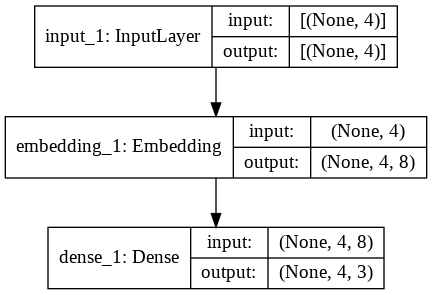

In [24]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [25]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 1s 611ms/step - loss: 1.0983 - accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0953 - accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0923 - accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0893 - accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 1.0863 - accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0833 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0803 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0773 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0744 - accuracy: 0.6250
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0714 - accuracy: 0.6250
Epoch 11/100
1/1 [========

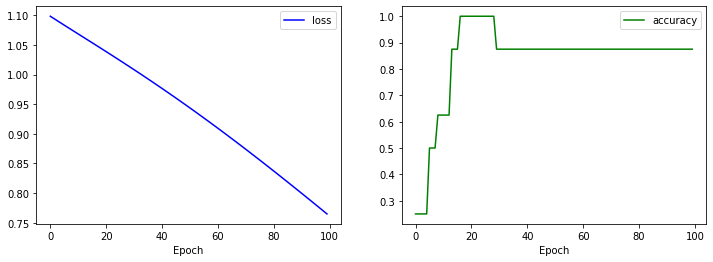

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [28]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 157ms/step - loss: 0.7611 - accuracy: 0.8750


[0.761088490486145, 0.875]

## 예측

In [29]:
# 추론할 입력
string = '나는 기분이 우울해'

In [30]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [31]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [32]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [33]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[0.31362036, 0.47651792, 0.20986179],
        [0.293251  , 0.47609133, 0.23065765],
        [0.388947  , 0.40038264, 0.21067032],
        [0.3118204 , 0.47756386, 0.21061571]]], dtype=float32)

In [34]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 1, 1]])

In [35]:
# 각 예측 값에 대한 label string
for row in y_pred_class:
    for val in row:
        print(val, ':', id_to_label[val])

1 : 중립
1 : 중립
1 : 중립
1 : 중립


# 문장 긍정(1), 부정(0) 분류 프로젝트

## 데이터

In [36]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [1, 0]  # 긍정(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '긍정'}

## Vocabulary

In [37]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [38]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [39]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [40]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [41]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [42]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[1, 0]

In [43]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [44]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [45]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([1, 0])

## 모델링

In [46]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[-0.02269197, -0.02251676,  0.02140293,  0.02206339,
         -0.00047792, -0.02706113, -0.04216756,  0.04379613],
        [ 0.0406014 ,  0.04663812, -0.04912005,  0.02137536,
         -0.03552498,  0.03079763, -0.01887438,  0.0176439 ],
        [-0.04510222, -0.01749524, -0.03069464, -0.03235413,
          0.03415643,  0.02556335,  0.00328976,  0.01015092],
        [-0.02967936, -0.02991739,  0.00316475, -0.01844382,
          0.02245689,  0.02856607,  0.04352779,  0.04978454]],

       [[-0.02269197, -0.02251676,  0.02140293,  0.02206339,
         -0.00047792, -0.02706113, -0.04216756,  0.04379613],
        [ 0.0406014 ,  0.04663812, -0.04912005,  0.02137536,
         -0.03552498,  0.03079763, -0.01887438,  0.0176439 ],
        [-0.00727046, -0.00860431, -0.02818472, -0.02904615,
          0.00718369,  0.04979399,  0.00346776,  0.03393613],
        [-0.04228636, -0.02767354,  0.02350846,  0.02676965,
         -0.01243507,  0.

In [47]:
# 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
pool = tf.keras.layers.GlobalMaxPool1D()
hidden_pool = pool(hidden)
hidden_pool

<tf.Tensor: shape=(2, 8), dtype=float32, numpy=
array([[0.0406014 , 0.04663812, 0.02140293, 0.02206339, 0.03415643,
        0.03079763, 0.04352779, 0.04978454],
       [0.0406014 , 0.04663812, 0.02350846, 0.02676965, 0.00718369,
        0.04979399, 0.03716813, 0.04379613]], dtype=float32)>

In [48]:
# 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
outputs = linear(hidden_pool)
outputs

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.4996026 , 0.5003974 ],
       [0.5000955 , 0.49990445]], dtype=float32)>

In [51]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    conv_1 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding = 'causal')
    hidden = conv_1(hidden)
    conv_2 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding = 'valid')
    hidden = conv_2(hidden)
    hidden = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units = 128, return_sequences = True))(hidden) # (bs, 128)
    hidden = tf.keras.layers.SimpleRNN(units = 128, return_sequences = True)(hidden)
    #######################################
    # 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
    pool = tf.keras.layers.GlobalMaxPool1D()
    hidden_pool = pool(hidden)  # (bs, d_model)
    # 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
    linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    outputs = linear(hidden_pool)  # (bs, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

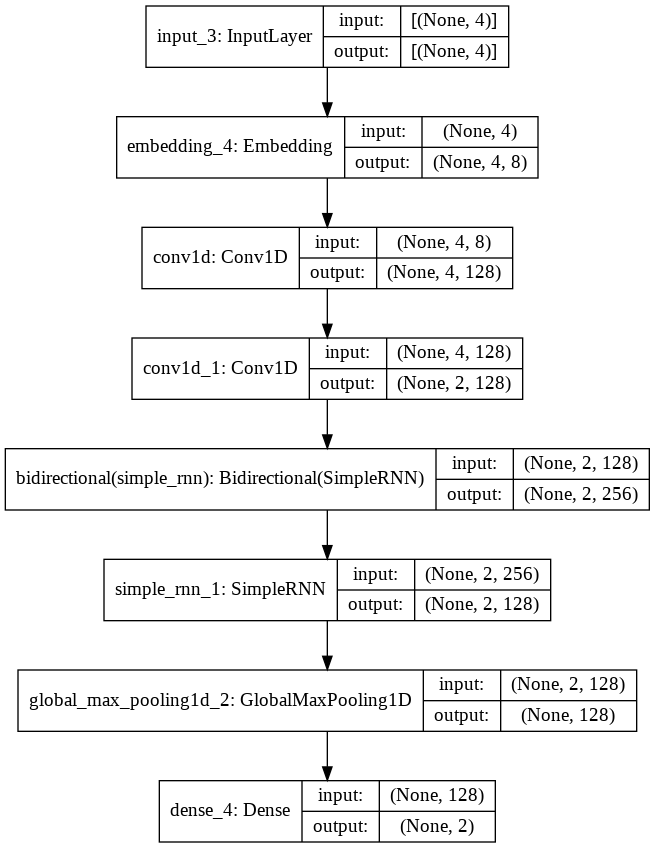

In [52]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 2)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [53]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=20, batch_size=16)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.7006 - accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6710 - accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6444 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6112 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 15ms/step - loss: 0.5674 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 12ms/step - loss: 0.5113 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 11ms/step - loss: 0.4437 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 9ms/step - loss: 0.3632 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 7ms/step - loss: 0.2771 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 8ms/step - loss: 0.1935 - accuracy: 1.0000
Epoch 11/20
1/1 [==============

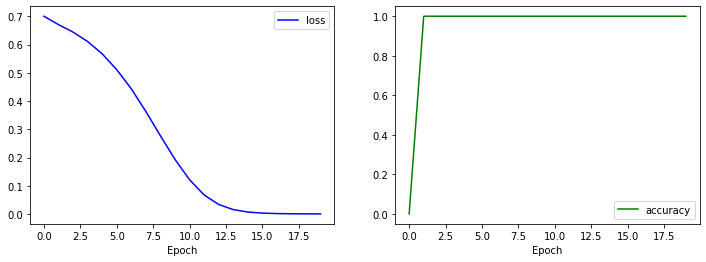

In [55]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [56]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 397ms/step - loss: 1.1068e-04 - accuracy: 1.0000


[0.00011067969899158925, 1.0]

## 예측

In [57]:
# 추론할 입력
string = '나는 기분이 우울해'

In [58]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [59]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [60]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [61]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[9.9959642e-01, 4.0361122e-04]], dtype=float32)

In [62]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=1)
y_pred_class

array([0])

In [63]:
# 각 예측 값에 대한 label string
for val in y_pred_class:
    print(val, ':', id_to_label[val])

0 : 부정
